# Data Preprocessing

## Import Libraries


In [3]:
# Import Libraries

import matplotlib.dates as dates
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col = 0)
real_estate = pd.read_csv('data/Ames_Real_Estate_Data.csv', index_col = 0)

/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
housing.shape

(2580, 81)

In [6]:
real_estate.shape

(22213, 90)

In [7]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [8]:
real_estate.columns

Index(['GeoRefNo', 'Tier', 'Range', 'Prop_Addr', 'ZngCdPr', 'ZngCdSc',
       'ZngOLPr', 'ZngOLSc', 'ClassPr_S', 'ClassSc_S', 'Legal_Pr', 'SchD_S',
       'TxD_S', 'MA_Ownr1', 'MA_Ownr2', 'MA_Line1', 'MA_Line2', 'MA_City',
       'MA_State', 'MA_Zip1', 'MA_Zip2', 'Rcrd_Yr', 'Rcrd_Mo', 'Inst1_No',
       'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr', 'LndAc_S', 'ImpAc_S', 'OthAc_S',
       'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D', 'X2TPr_D', 'X2TSc_D',
       'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S', 'LndAcX1S', 'ImpAcX1S',
       'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S', 'MilVal_S', 'AcreX_S1',
       'AcreGr', 'AcreNt_S', 'Neighborhood', 'LotArea', 'ParType', 'BldgNo_S',
       'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle', 'Foundation',
       'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating', 'Central Air',
       'GLA', 'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea',
       'GarageType', 'GarYrBlt', 'Cars', 'GarageArea', 'YrSold_YYYY',
       'MoSold_MM', 'SalePrice', 

## Dealing with Missing Data


Text(0.5, 1, 'Real Estate Dataframe NA Values')

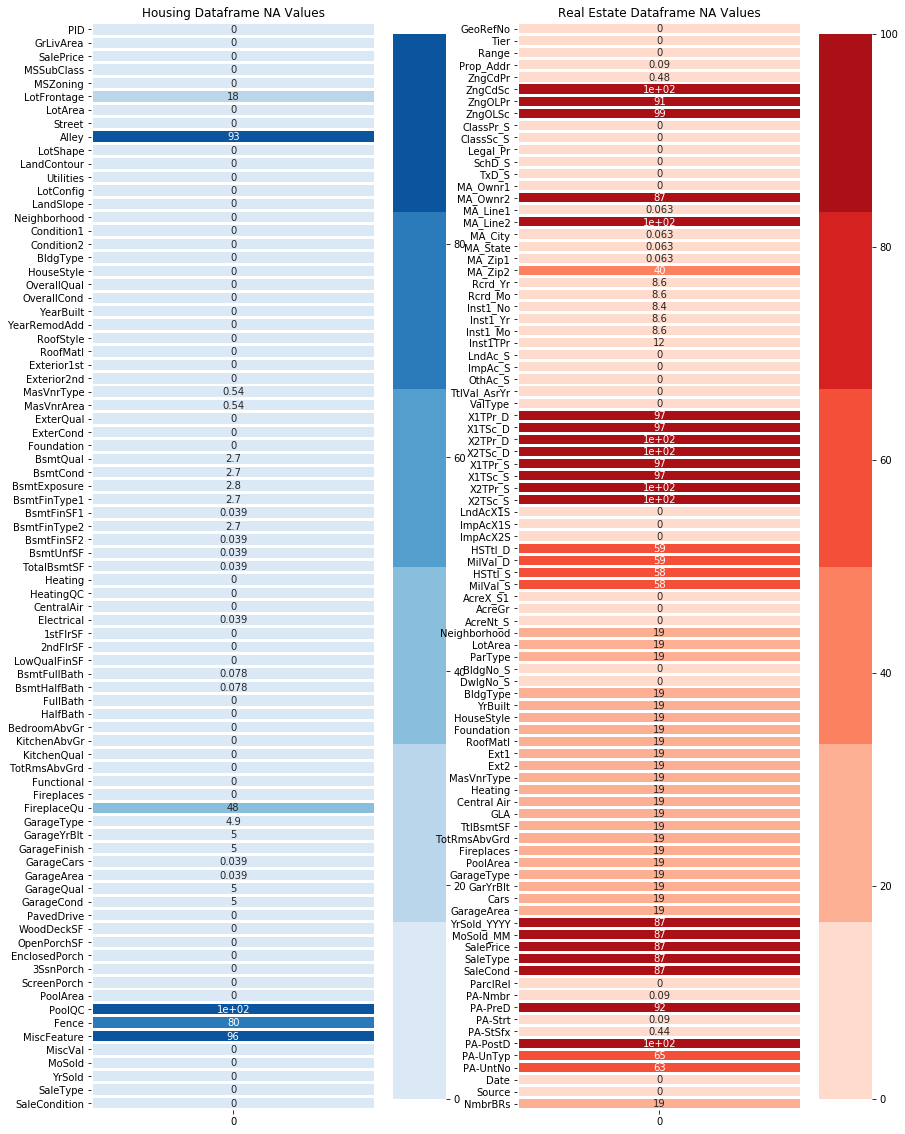

In [9]:
from IPython.display import display, HTML

cm = sns.light_palette("green",as_cmap=True)
plt.figure(figsize=(14,20))

# Housing Dataframe
plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(housing.isnull().sum()/housing.shape[0]*100),annot=True,cmap=sns.color_palette("Blues"),
           linewidth=2,linecolor="white")
plt.title("Housing Dataframe NA Values")

# Real Estate Dataframe
plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(real_estate.isnull().sum()/real_estate.shape[0]*100),annot=True,cmap=sns.color_palette("Reds"),
           linewidth=2,linecolor="white")
plt.title("Real Estate Dataframe NA Values")


## Mutating Columns

In [10]:
# Create a new column MasVnrArea2 where if MasVnrArea ==0, 0 else 1
housing['MasVnrArea2'] = np.where(housing['MasVnrArea']== 0, 0, 1)

In [11]:
# Create a new colulmn GarageArea2 where the NA values are now 0
housing['GarageArea2'] = housing['GarageArea'].fillna(0)

In [12]:
# Create a new colulmn PoolArea2 where the NA values are now 0
housing['PoolArea2'] = housing['PoolArea'].fillna(0)

In [13]:
# replace NA values with 0
housing['2ndFlrSF'] = housing['2ndFlrSF'].fillna(0)

In [14]:
# Create a new column HalfBath2 and BsmtHalfBath where having a half bathroom = 0.5 for future mutation
housing['HalfBath2'] = np.where(housing['HalfBath']==1, 0.5, 0)
housing['BsmtHalfBath2'] = np.where(housing['BsmtHalfBath']==1, 0.5, 0)

In [15]:
# If BsmtFinType1 is GLQ or ALQ, we use the BsmtFinSF1
housing['BasmtFinSF1']=np.where((housing['BsmtFinType1']=='ALQ')|(housing['BsmtFinType1']=='GLQ'),\
                                 housing['BsmtFinSF1'],0)

In [16]:
# If BsmtFinType2 is GLQ or ALQ, we use the BsmtFinSF2
housing['BasmtFinSF2']=np.where((housing['BsmtFinType2']=='ALQ')|(housing['BsmtFinType2']=='GLQ'),\
                                 housing['BsmtFinSF2'],0)

In [17]:
# The Total Square Feet of Basement Finish is BasmtFinSF1 + BasmtFinSF2
housing['BasmtFinSF'] = housing['BasmtFinSF1'] + housing['BasmtFinSF2']

In [18]:
# Total Living Area is GrLivArea + BasmtFinSF
housing['total_LivArea'] = housing['GrLivArea'] + housing['BasmtFinSF']

In [19]:
# Create num_bathroom
housing['num_bathroom'] = housing['BsmtHalfBath2'] + housing['HalfBath2'] + \
                          housing['FullBath'] + housing['BsmtFullBath']

In [20]:
# Check the newly created columns
housing[['PID','BasmtFinSF1', 'BasmtFinSF2', 'BasmtFinSF', 'total_LivArea', 'num_bathroom']]

,PID,BasmtFinSF1,BasmtFinSF2,BasmtFinSF,total_LivArea,num_bathroom
1,909176150,0.0,0.0,0.0,856.0,2.0
2,905476230,552.0,393.0,945.0,1994.0,3.0
3,911128020,737.0,0.0,737.0,1738.0,1.0
4,535377150,0.0,0.0,0.0,1039.0,1.0
5,534177230,643.0,0.0,643.0,2308.0,3.5
...,...,...,...,...,...,...
759,903205040,0.0,0.0,0.0,952.0,1.0
760,905402060,0.0,0.0,0.0,1733.0,2.0
761,909275030,0.0,0.0,0.0,2002.0,2.0
762,907192040,841.0,0.0,841.0,2683.0,3.5


In [21]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [22]:
housing.shape

# 91 columns (created 10 new columns)

(2580, 91)

## Merge Data

In [69]:
# Merge housing and real_estate dataframe
ames_df = pd.merge(housing, real_estate, how = 'left', left_on = ['PID'], right_on = ['MapRefNo'], \
                   suffixes=('', '_y'))
ames_df.drop(ames_df.filter(regex = '_y$').columns.tolist(), axis = 1, inplace = True)

In [70]:
pd.set_option('display.max_columns', None)
ames_df.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MasVnrArea2,GarageArea2,PoolArea2,HalfBath2,BsmtHalfBath2,BasmtFinSF1,BasmtFinSF2,BasmtFinSF,total_LivArea,num_bathroom,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,Legal_Pr,SchD_S,TxD_S,MA_Ownr1,MA_Ownr2,MA_Line1,MA_Line2,MA_City,MA_State,MA_Zip1,MA_Zip2,Rcrd_Yr,Rcrd_Mo,Inst1_No,Inst1_Yr,Inst1_Mo,Inst1TPr,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,ValType,X1TPr_D,X1TSc_D,X2TPr_D,X2TSc_D,X1TPr_S,X1TSc_S,X2TPr_S,X2TSc_S,LndAcX1S,ImpAcX1S,ImpAcX2S,HSTtl_D,MilVal_D,HSTtl_S,MilVal_S,AcreX_S1,AcreGr,AcreNt_S,ParType,BldgNo_S,DwlgNo_S,YrBuilt,Ext1,Ext2,Central Air,GLA,TtlBsmtSF,GarYrBlt,Cars,YrSold_YYYY,MoSold_MM,SaleCond,ParclRel,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,0,399.0,0,0.0,0.0,0.0,0.0,0.0,856.0,2.0,909176150.0,0.0,0.0,436 HAYWARD AVE,RL,NaN,NaN,NaN,RESIDENTIAL,1-STORY 1945 & OLDER,LEE & LITTLE ADD LOT 9 EX E50' BLK 2,1.0,1.0,"GREINER, RODNEY & CELIA",NaN,2088 QUAIL RIDGE RD,NaN,AMES,IA,50010.0,NaN,2017.0,2.0,2017-01476,2017.0,2.0,D,37300.0,0.0,111700.0,149000.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Dwg&Lot,0.0,1.0,1939.0,Wd Sdng,Wd Sdng,Yes,856.0,856.0,1939.0,2.0,2017.0,2.0,Normal,Deed,436,NaN,HAYWARD,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,1,266.0,0,0.0,0.0,552.0,393.0,945.0,1994.0,3.0,905476230.0,0.0,0.0,3416 WEST ST,RL,NaN,NaN,NaN,RESIDENTIAL,1-STORY TWNHM - 1946 & NEWER,WEST AMES ADD BEG NE COR LOT 12 BLK 1 S99.94' ...,1.0,1.0,"HUBERT, JOHN F & GRETTA R",NaN,3416 WEST ST,NaN,AMES,IA,50014.0,3541.0,2020.0,1.0,2020-00358,2020.0,1.0,WRDJSV,43500.0,0.0,130600.0,174100.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Dwg&Lot,0.0,1.0,1984.0,HdBoard,HdBoard,Yes,1049.0,1049.0,1984.0,1.0,2020.0,1.0,Normal,Deed,3416,NaN,WEST,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,1,266.0,0,0.0,0.0,552.0,393.0,945.0,1994.0,3.0,905476230.0,0.0,0.0,3416 WEST ST,RL,NaN,NaN,NaN,RESIDENTIAL,1-STORY TWNHM - 1946 & NEWER,WEST AMES ADD BEG NE COR LOT 12 BLK 1 S99.94' ...,1.0,1.0,"HUBERT, JOHN F & GRETTA R",NaN,3416 WEST ST,NaN,

In [71]:
ames_df.shape

(2624, 166)

## Geocoding

#### 1. Address column based on the following:
'MA_Line1','MA_City','MA_State','MA_Zip1'

In [ ]:
# Calculate geographic coordinates of places using google geocoding API

In [73]:
ames_df[['MA_Line1','MA_City','MA_State','MA_Zip1']]

,MA_Line1,MA_City,MA_State,MA_Zip1
0,2088 QUAIL RIDGE RD,AMES,IA,50010.0
1,3416 WEST ST,AMES,IA,50014.0
2,3416 WEST ST,AMES,IA,50014.0
3,320 S 2ND ST,AMES,IA,50010.0
4,1524 DOUGLAS AVE,AMES,IA,50010.0
...,...,...,...,...
2619,1021 RIDGEWOOD AVE,AMES,IA,50010.0
2620,460 WESTWOOD DR,AMES,IA,50014.0
2621,799 W HAMILTON AVE,STATE COLLEGE,PA,16801.0
2622,5319 CLEMENS BLVD,AMES,IA,50014.0


In [76]:
# Create an address column by concatenating MA_Line1, Ma_City, and MA_State
ames_df['address'] = ames_df['MA_Line1'].map(str) + ', ' + ames_df['MA_City'].map(str) + ', ' + \
ames_df['MA_State'].map(str)

#### 2. Address2 column based on the following:
'PA-Nmbr', 'PA-PreD','PA-Strt', 'PA-StSfx', 'PA-PostD', 'PA-UnTyp', 'PA-UntNo'

In [99]:
ames_df['PA-PreD'] = ames_df['PA-PreD'].replace(np.nan, '', regex=True)
ames_df['PA-UnTyp'] = ames_df['PA-UnTyp'].replace(np.nan, '', regex=True)
ames_df['PA-UntNo'] = ames_df['PA-UntNo'].replace(np.nan, '', regex=True)

In [100]:
ames_df[['PA-Nmbr', 'PA-PreD','PA-Strt', 'PA-StSfx', 'PA-UnTyp', 'PA-UntNo']]

,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo
0,436,,HAYWARD,AVE,NaN,,
1,3416,,WEST,ST,NaN,,
2,3416,,WEST,ST,NaN,,
3,320,S,2ND,ST,NaN,,
4,1524,,DOUGLAS,AVE,NaN,,
...,...,...,...,...,...,...,...
2598,1021,,RIDGEWOOD,AVE,NaN,,
2599,3619,,MARY,CIR,NaN,,
2600,2140,,SUNSET,DR,NaN,,2142
2601,5319,,CLEMENS,BLVD,NaN,,


In [87]:
ames_df['PA-Nmbr'].isnull().sum()

21

In [96]:
ames_df = ames_df.dropna(subset=['PA-Nmbr']).reset_index()

In [97]:
ames_df['PA-Nmbr'].isnull().sum()

0

In [118]:
ames_df['PA-Nmbr'] = ames_df['PA-Nmbr'].astype(int).astype(str)

In [125]:
# Create an address column
ames_df['address2'] = ames_df['PA-Nmbr'].map(str) + ' ' + ames_df['PA-PreD'].map(str) + ' ' + \
ames_df['PA-Strt'].map(str) + ' ' + ames_df['PA-StSfx'].map(str) + ', AMES, ' + 'IA'

In [126]:
ames_df[['address', 'address2']].head(50)

,address,address2
0,"2088 QUAIL RIDGE RD, AMES, IA","436 HAYWARD AVE, AMES, IA"
1,"3416 WEST ST, AMES, IA","3416 WEST ST, AMES, IA"
2,"3416 WEST ST, AMES, IA","3416 WEST ST, AMES, IA"
3,"320 S 2ND ST, AMES, IA","320 S 2ND ST, AMES, IA"
4,"1524 DOUGLAS AVE, AMES, IA","1524 DOUGLAS AVE, AMES, IA"
5,"2304 FILLMORE AVE, AMES, IA","2304 FILLMORE AVE, AMES, IA"
6,"4003 MARIGOLD DR, AMES, IA","4003 MARIGOLD DR, AMES, IA"
7,"212 10TH ST, AMES, IA","212 10TH ST, AMES, IA"
8,"2431 LAKESIDE DR, AMES, IA","2431 LAKESIDE DR, AMES, IA"
9,"602 KEN MARIL RD, AMES, IA","602 KEN MARIL RD, AMES, IA"


#### Get latitude and longitutde using geocode

In [121]:
from geopy.geocoders import Nominatim
locator = Nominatim(user_agent = 'myGeocoder')

In [32]:
from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
ames_df['location'] = ames_df['address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
ames_df['point'] = ames_df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
ames_df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(ames_df['point'].tolist(), index=ames_df.index)


In [127]:
from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
ames_df['location2'] = ames_df['address2'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
ames_df['point2'] = ames_df['location2'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
ames_df[['latitude2', 'longitude2', 'altitude2']] = pd.DataFrame(ames_df['point2'].tolist(), index=ames_df.index)

In [34]:
# Scenario 2: just in case the above doesnt workk
#-----------------------------------------------#
#from googlemaps import Client as GoogleMaps
#gmaps = GoogleMaps('AIzaSyB2tmtjzI_gUiho3mQ8rqFpGl_NEOo3mO')
#ames_df['long'] = ""
#ames_df['lat'] = ""
#for x in range(len(ames_df)):
    #try:
        #time.sleep(1) #to add delay in case of large DFs
        #geocode_result = gmaps.geocode(ames_df['address'][x])
        #ames_df['lat'][x] = geocode_result[0]['geometry']['location'] ['lat']
        #ames_df['long'][x] = geocode_result[0]['geometry']['location']['lng']
    #except IndexError:
        #print("Address was wrong...")
    #except Exception as e:
        #print("Unexpected error occurred.", e )
#ames_df.head()
#-----------------------------------------------#

In [129]:
ames_df[['latitude2', 'longitude2', 'altitude2', 'address2']]

,latitude2,longitude2,altitude2,address2
0,42.018564,-93.651619,0.0,"436 HAYWARD AVE, AMES, IA"
1,42.024855,-93.663671,0.0,"3416 WEST ST, AMES, IA"
2,42.024855,-93.663671,0.0,"3416 WEST ST, AMES, IA"
3,42.021548,-93.614068,0.0,"320 S 2ND ST, AMES, IA"
4,42.037391,-93.612207,0.0,"1524 DOUGLAS AVE, AMES, IA"
...,...,...,...,...
2598,42.032102,-93.626373,0.0,"1021 RIDGEWOOD AVE, AMES, IA"
2599,42.027669,-93.666138,0.0,"3619 MARY CIR, AMES, IA"
2600,42.020129,-93.643832,0.0,"2140 SUNSET DR, AMES, IA"
2601,42.016802,-93.689748,0.0,"5319 CLEMENS BLVD, AMES, IA"


In [130]:
ames_df['latitude2'].isnull().sum()

66

66 missing values for latitude and longitude. Manually fill in the null values. 

In [132]:
ames_df.to_csv('data/final_data3.csv')

In [155]:
ames_housing = pd.read_csv('data/final_data3.csv', index_col = 0)

In [156]:
ames_housing.shape

(2603, 175)

In [157]:
ames_housing['latitude2'].isnull().sum()

0

#### Create new column - Iowa State University Latitude and Longtitude

In [158]:
# Create a new column with Iowa State University Latitude and Longtitude
Iowa_state = [] 
Iowa_state_lat = []
Iowa_state_long = []
for index,row in ames_housing.iterrows():
    Iowa_state.append('(42.02704410769817, -93.64641075013807)')
    Iowa_state_lat.append(42.02704410769817)
    Iowa_state_long.append(-93.64641075013807)
    
ames_housing["ISU_lat_long"] = Iowa_state
ames_housing["ISU_lat"] = Iowa_state_lat
ames_housing["ISU_long"] = Iowa_state_long

In [159]:
ames_housing[['ISU_lat_long', 'ISU_lat', 'ISU_long']]

,ISU_lat_long,ISU_lat,ISU_long
0,"(42.02704410769817, -93.64641075013807)",42.027044,-93.646411
1,"(42.02704410769817, -93.64641075013807)",42.027044,-93.646411
2,"(42.02704410769817, -93.64641075013807)",42.027044,-93.646411
3,"(42.02704410769817, -93.64641075013807)",42.027044,-93.646411
4,"(42.02704410769817, -93.64641075013807)",42.027044,-93.646411
...,...,...,...
2598,"(42.02704410769817, -93.64641075013807)",42.027044,-93.646411
2599,"(42.02704410769817, -93.64641075013807)",42.027044,-93.646411
2600,"(42.02704410769817, -93.64641075013807)",42.027044,-93.646411
2601,"(42.02704410769817, -93.64641075013807)",42.027044,-93.646411


#### Calculate Distance using Geopy

In [160]:
# Importing the geodesic module from the library 
from geopy.distance import geodesic 
  
# Loading the lat-long data for Kolkata & Delhi 
kolkata = (22.5726, 88.3639) 
delhi = (28.7041, 77.1025) 
  
# Print the distance calculated in km 
print(geodesic(kolkata, delhi).km) 

1318.13891581683


In [161]:
from ames_function import dist_from_coordinates

new_column = [] #empty column for distance
for index,row in ames_housing.iterrows():
  lat1 = row['latitude2'] #first row of location.lat column here
  lon1 = row['longitude2'] #first row of location.long column here
  lat2 = row['ISU_lat'] #second row of location.lat column here
  lon2 = row['ISU_long'] #second row of location.long column here
  value = dist_from_coordinates(lat1, lon1, lat2, lon2)  #get the distance
  new_column.append(value)   #append the empty list with distance values

ames_housing.insert(4,"Distance",new_column)  #4 is the index where you want to place your column.

In [162]:
ames_housing[['Distance']]

,Distance
0,1.036411
1,1.446325
2,1.446325
3,2.740599
4,3.050284
...,...
2598,1.747982
2599,1.630931
2600,0.797885
2601,3.756711


In [163]:
ames_housing.Distance.isnull().sum()

0

## Final Look into the Data

In [164]:
pd.set_option('display.max_columns', None)
ames_housing.head()

,index,PID,GrLivArea,SalePrice,Distance,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MasVnrArea2,GarageArea2,PoolArea2,HalfBath2,BsmtHalfBath2,BasmtFinSF1,BasmtFinSF2,BasmtFinSF,total_LivArea,num_bathroom,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,Legal_Pr,SchD_S,TxD_S,MA_Ownr1,MA_Ownr2,MA_Line1,MA_Line2,MA_City,MA_State,MA_Zip1,MA_Zip2,Rcrd_Yr,Rcrd_Mo,Inst1_No,Inst1_Yr,Inst1_Mo,Inst1TPr,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,ValType,X1TPr_D,X1TSc_D,X2TPr_D,X2TSc_D,X1TPr_S,X1TSc_S,X2TPr_S,X2TSc_S,LndAcX1S,ImpAcX1S,ImpAcX2S,HSTtl_D,MilVal_D,HSTtl_S,MilVal_S,AcreX_S1,AcreGr,AcreNt_S,ParType,BldgNo_S,DwlgNo_S,YrBuilt,Ext1,Ext2,Central Air,GLA,TtlBsmtSF,GarYrBlt,Cars,YrSold_YYYY,MoSold_MM,SaleCond,ParclRel,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs,address,address2,address3,location2,point2,latitude2,longitude2,altitude2,ISU_lat_long,ISU_lat,ISU_long
0,0,909176150,856,126000,1.036411,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,0,399,0,0.0,0.0,0,0,0,856,2.0,909176150,0,0,436 HAYWARD AVE,RL,NaN,NaN,NaN,RESIDENTIAL,1-STORY 1945 & OLDER,LEE & LITTLE ADD LOT 9 EX E50' BLK 2,1,1,"GREINER, RODNEY & CELIA",NaN,2088 QUAIL RIDGE RD,NaN,AMES,IA,50010.0,NaN,2017,2,2017-01476,2017,2,D,37300,0,111700,149000,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0,Dwg&Lot,0,1,1939.0,Wd Sdng,Wd Sdng,Yes,856.0,856.0,1939.0,2.0,2017.0,2.0,Normal,Deed,436,NaN,HAYWARD,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0,"2088 QUAIL RIDGE RD, AMES, IA","436 HAYWARD AVE, AMES, IA",436,"436, Hayward Avenue, Old Orchard Mobile Home P...","(42.01856448979592, -93.65161918367347, 0.0)",42.018564,-93.651619,0.0,"(42.02704410769817, -93.64641075013807)",42.027044,-93.646411
1,1,905476230,1049,139500,1.446325,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,1,266,0,0.0,0.0,552,393,945,1994,3.0,905476230,0,0,3416 WEST ST,RL,NaN,NaN,NaN,RESIDENTIAL,1-STORY TWNHM - 1946 & NEWER,WEST AMES ADD BEG NE COR LOT 12 BLK 1 S99.94' ...,1,1,"HUBERT, JOHN F & GRETTA R",NaN,3416 WEST ST,NaN,AMES,IA,50014.0,3541.0,2020,1,2020-00358,2020,1,WRDJSV,43500,0,130600,174100,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0,Dwg&Lot,0,1,1984.0,HdBoard,HdBoard,Yes,1049.0,1049.0,1984.0,1.0,2020.0,1.0,Normal,Deed,3416,NaN,WEST,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0,"3416 WEST ST, AMES, IA","3416 WEST ST, AMES, IA",3416,"3416, West Street, Ontario, Ames, Story County...","(42.024855315930424, -93.66367099341755, 0.0)",42.024855,-93.663671,0.0,"(42.02704410769817, -93.64641075013807)",42.027044,-93.646411
2,2,905476230,1049,139500,1.446325,120,RL,42.0,4235,Pave,NaN,R

In [165]:
ames_housing.shape

(2603, 179)

In [166]:
ames_housing.Distance.isnull().sum()

0

<Figure size 1008x720 with 0 Axes>

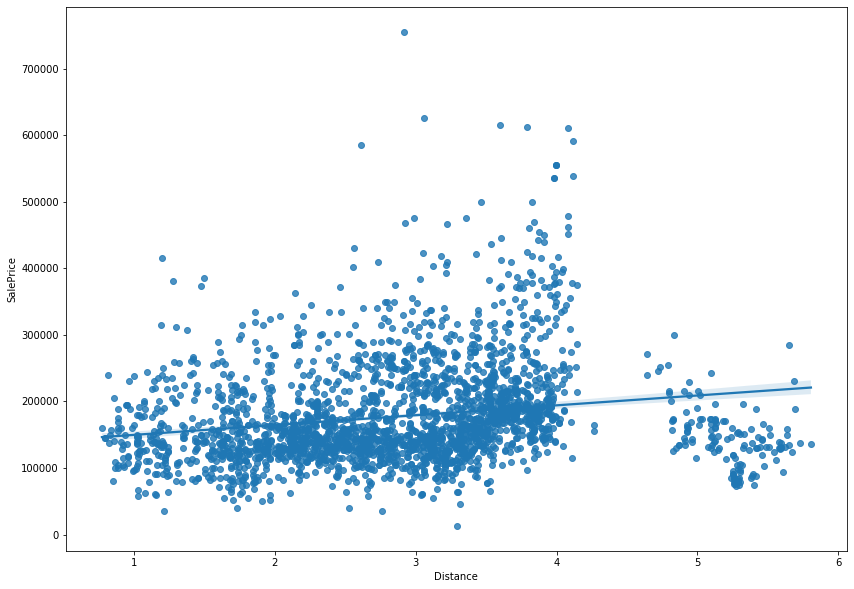

In [167]:
plt.figure(figsize = (14,10))
# Distance VS Sale Price
plt.figure(figsize = (14,10))
sns.regplot(x = 'Distance', y = 'SalePrice', data = ames_housing)

## Export Data


In [40]:
#housing.to_csv('data/Ames_Housing_Price_Data.csv')

In [42]:
#ames_df.to_csv('data/final_data.csv')

In [61]:
#ames_df2.to_csv('data/final_data2.csv')

In [172]:
#final_df3.to_csv('data/final_df.csv')

In [168]:
ames_housing.to_csv('data/final_df.csv')